# Inspecting the CelebA Dataset

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from PIL import Image
from pathlib import Path
from tqdm import tqdm

Example of getting all pictures belonging to the identity of the `i`-th picture.

In [2]:
i = 100

In [3]:
identity_path = "./CelebA/identity_CelebA.txt"
identity_df = pd.read_csv(identity_path, sep=" ", header=None, names=["image_id", "identity"])

identity_groups = defaultdict(list)
for _, row in identity_df.iterrows():
    identity_groups[row['identity']].append(row['image_id'])

In [4]:
example_identity = list(identity_groups.keys())[i]
print(f"Images for Identity {example_identity}: {identity_groups[example_identity]}")

Images for Identity 273: ['000103.jpg', '002822.jpg', '005864.jpg', '013191.jpg', '015069.jpg', '024891.jpg', '030232.jpg', '040038.jpg', '040972.jpg', '041216.jpg', '045871.jpg', '051897.jpg', '070373.jpg', '086045.jpg', '086926.jpg', '090258.jpg', '091632.jpg', '094740.jpg', '106949.jpg', '112659.jpg', '113173.jpg', '125945.jpg', '128046.jpg', '133552.jpg', '137651.jpg', '138272.jpg', '138569.jpg', '144857.jpg', '152937.jpg', '158023.jpg']


In [5]:
CELEB_A_ORIGINAL_TRAIN_PATH = "./CelebA/CelebA_original/train/"

In [6]:
def show_identity_images(identity_group):
    for img_name in identity_group:
        img_path = CELEB_A_ORIGINAL_TRAIN_PATH + img_name
        try:
            img = Image.open(img_path)
            width, height = img.size  # Dimensionen des Bildes

            # Erstelle die Plot-Figur
            plt.figure(figsize=(4, 4))
            plt.imshow(img)
            plt.axis("off")

            # Titel mit Bildname und Dimensionen
            plt.title(f"{img_name}\n{width}x{height} px", fontsize=10)
            plt.show()
        except Exception as e:
            print(f"Error while reading {img_name}: {e}")

In [7]:
def show_image_by_name(img_name):
    img_path = CELEB_A_ORIGINAL_TRAIN_PATH + img_name
    try:
        img = Image.open(img_path)
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.axis("off")
        plt.title(img_name)
        plt.show()
    except Exception as e:
        print(f"Error while reading {img_name}: {e}")

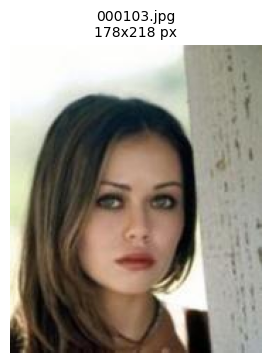

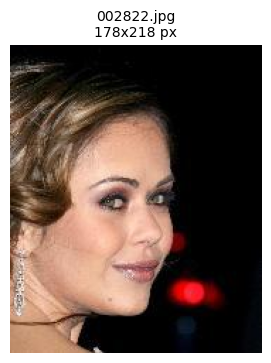

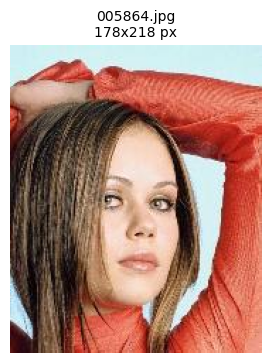

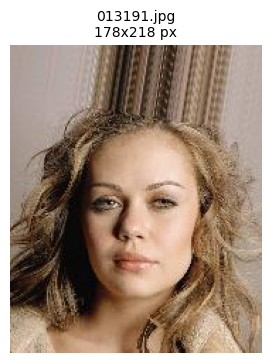

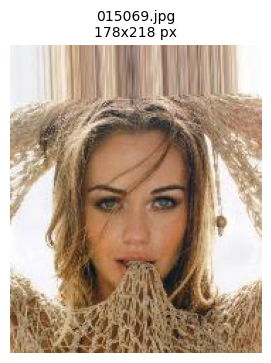

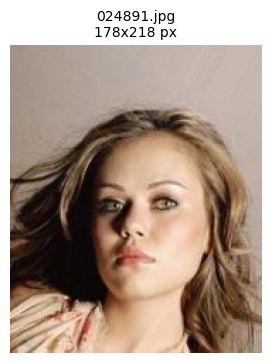

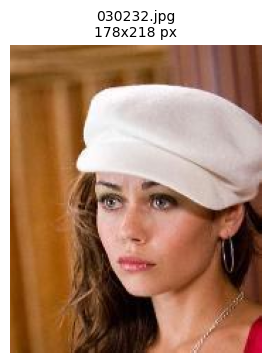

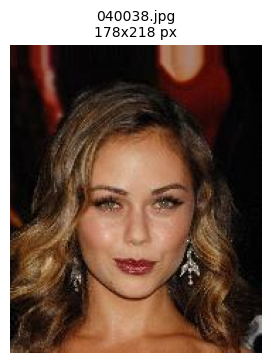

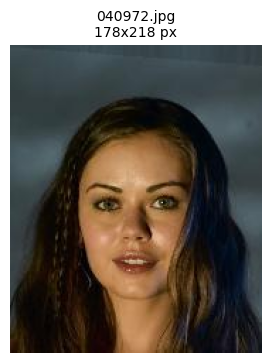

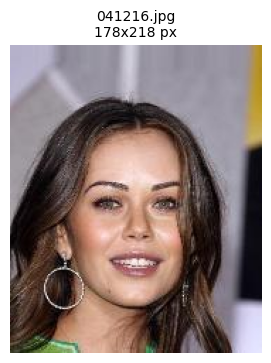

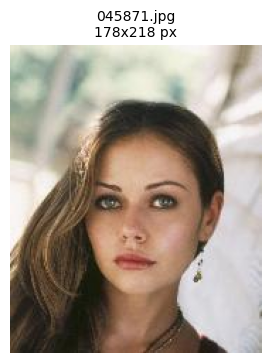

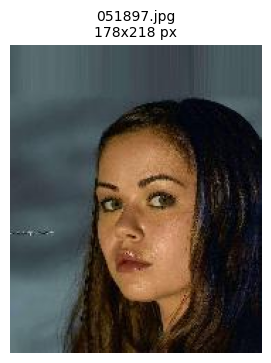

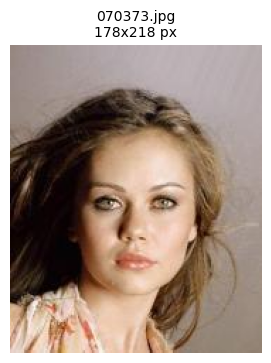

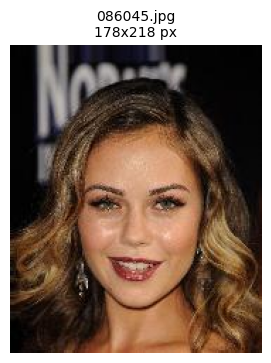

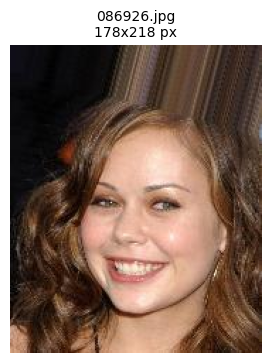

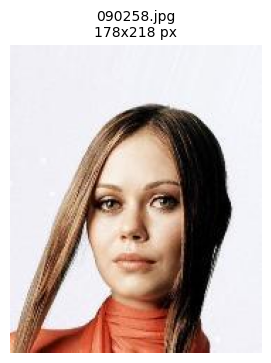

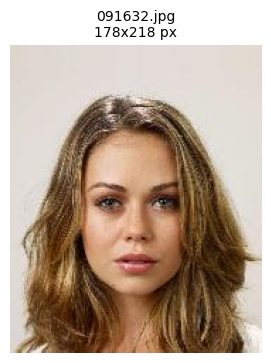

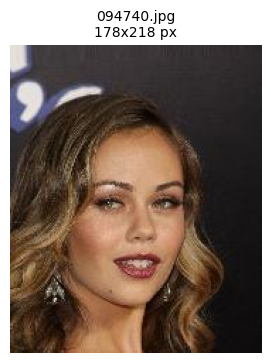

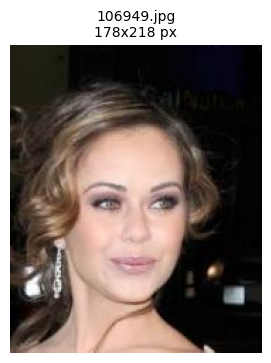

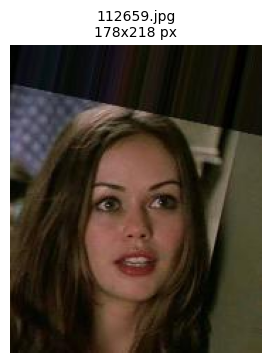

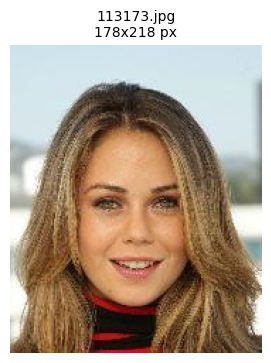

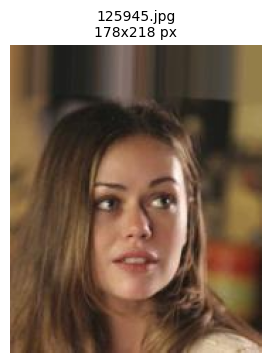

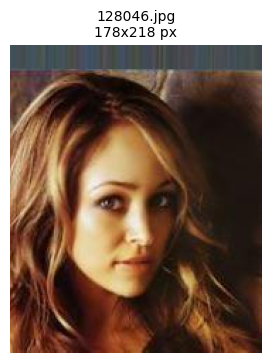

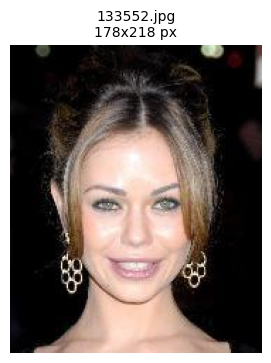

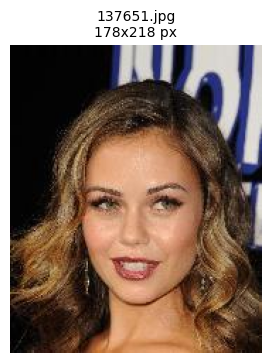

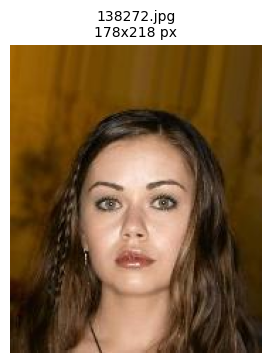

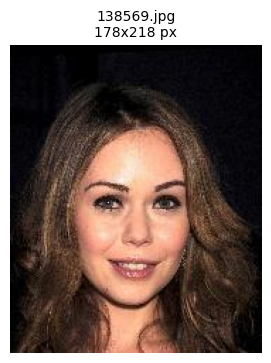

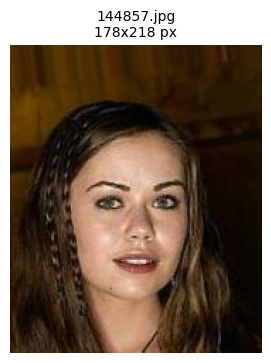

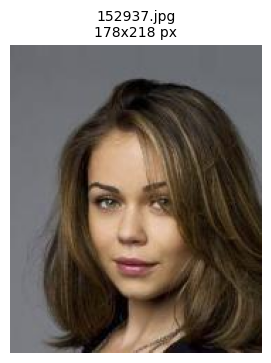

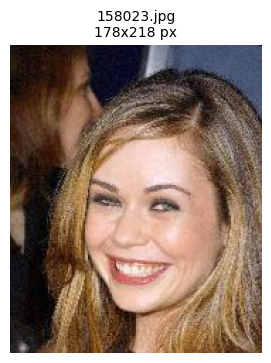

In [8]:
show_identity_images(identity_groups[example_identity])

## Calculating Mean and Standard Deviation

In [9]:
image_paths = [
    os.path.join(CELEB_A_ORIGINAL_TRAIN_PATH, img)
    for img in os.listdir(CELEB_A_ORIGINAL_TRAIN_PATH)
    if img.lower().endswith('.jpg')
]

rgb_values = np.concatenate(
    [np.array(Image.open(img).convert("RGB")).reshape(-1, 3) for img in tqdm(image_paths)], 
    axis=0
) / 255.0

mu_rgb = np.mean(rgb_values, axis=0)
std_rgb = np.std(rgb_values, axis=0)

print(f"Mean RGB values: {mu_rgb}")
print(f"Std RGB values: {std_rgb}")

  1%|          | 1221/162127 [00:03<07:13, 371.12it/s]

100%|██████████| 162127/162127 [05:39<00:00, 477.89it/s] 


Mean RGB values: [0.50641638 0.42589831 0.38323391]
Std RGB values: [0.31044251 0.29029403 0.28966635]
